In [2]:
"""
X_train
y_trian
model predict func 
cost func 
gradient func 
gradient_descent func 
"""

'\nX_train\ny_trian\nmodel predict func \ncost func \ngradient func \ngradient_descent func \n'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math, copy
np.set_printoptions(precision=2) 

In [4]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [5]:
def f_wb(x, w, b):
    """
    predict one loop in the matrix
    """
    p=0
    m=len(x)
    f_wb = np.dot(x,w)
    p = p + f_wb
    p = p + b
    return p

In [6]:
x_vec = X_train[0,:]
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

f_wb(x_vec, w_init, b_init)

459.9999976194082

In [7]:
def compute_cost(x, y, w, b):
    """
    j_wb = 1/2m* sum(f_wb(x[i]) - y)**2
    """
    
    n= x.shape[0]
    cost = 0
    for i in range(n):
        err = (np.dot(x[i],w)+b) -y[i]
        cost += err**2
    return cost/(2*n)

In [8]:
compute_cost(X_train, y_train, w_init, b_init)

1.5578904330213735e-12

In [9]:
def compute_gradient(x, y, w, b):
    """
    dj_dw(j(w,b)) = 1/m * (wx[i]+b -y)* x[i]
    dj_db(j(w,b)) = 1/m * (wx[i]+b -y)
    """
    m,n = x.shape
    d_dw = np.zeros(n,)
    d_db = 0.
    for i in range(m):
        err = (np.dot(x[i],w)+b)-y[i]
        for j in range(n):
            d_dw[j] = d_dw[j]+ err* x[i,j]
            
        d_db = d_db +err
    d_dw = d_dw/m
    d_db = d_db/m
    return d_dw, d_db

In [10]:
compute_gradient(X_train, y_train, w_init, b_init)

(array([-2.73e-03, -6.27e-06, -2.22e-06, -6.92e-05]), -1.6739251122999121e-06)

In [11]:
def gradient_descent(x, y, w_in, b_in, compute_cost, compute_gradient, alpha, iter_num):
    """
    w= w- alpha* dj_dw
    b= b-alpha* dj_db
    """
    J_history= []
    W_hist =np.empty([iter_num,4])
    w =copy.deepcopy(w_in)
    b= b_in
    for i in range(iter_num):
        
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        
        w = w- alpha * dj_dw
        b = b- alpha * dj_db
        W_hist[i]=w
        if i< 100000:
            J_history.append(compute_cost(x, y, w, b))
        
        
    return w, b, J_history, W_hist     

In [16]:
initial_w = np.zeros_like(w_init)
initial_b = 0.
iterations = 100000
alpha = 1.0e-8

w_final, b_final, J_hist, W_hist =gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

b,w found by gradient descent: -0.00,[ 0.21  0.01 -0.02 -0.13] 
prediction: 426.75, target value: 460
prediction: 285.87, target value: 232
prediction: 170.55, target value: 178


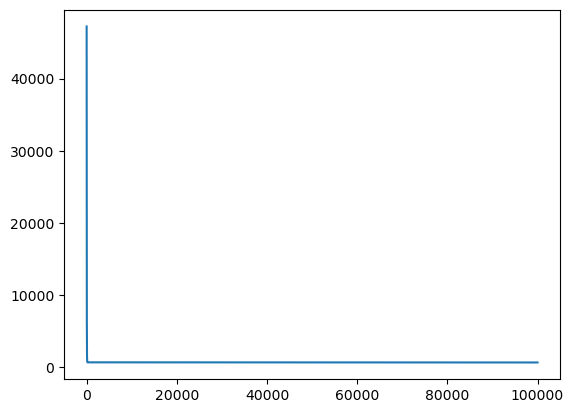

In [18]:
plt.plot(np.arange(1,100001), J_hist)
plt.show()

In [23]:
W_hist[:00,1]

array([1.12e-05, 2.21e-05, 3.27e-05, ..., 5.57e-04, 5.57e-04, 5.58e-04])

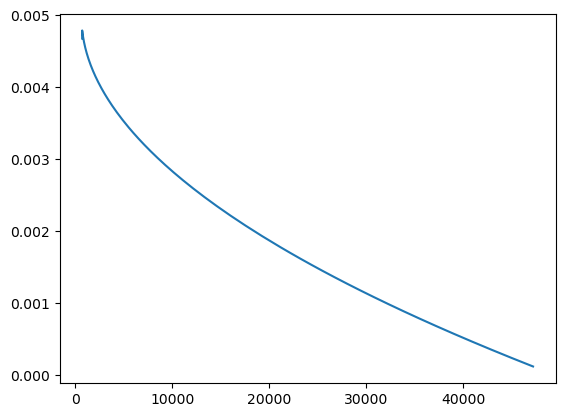

In [15]:
plt.plot(J_hist, W_hist[:,3])
plt.show()